In [1]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('POP.csv')

In [3]:
np.random.seed(42)
df['cpi'] = 100 + np.random.randn(len(df)).cumsum() * 0.1  

In [5]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [7]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [8]:
exog_train = train[['cpi']]
exog_test = test[['cpi']]

stepwise_model = auto_arima(
    train['value'],
    exogenous=exog_train,
    seasonal=True,
    m=12,
    start_p=0, start_q=0, max_p=5, max_q=5,
    start_P=0, start_Q=0, max_P=3, max_Q=3,
    max_d=2, max_D=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(f"Best SARIMAX order: {stepwise_model.order} seasonal_order: {stepwise_model.seasonal_order}")

C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\App

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=5831.867, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=5425.065, Time=0.29 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=5615.557, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=5831.604, Time=0.03 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(2,0,0)[12]             : AIC=5366.658, Time=0.42 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(3,0,0)[12]             : AIC=inf, Time=0.84 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(2,0,1)[12]             : AIC=5274.253, Time=1.90 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(1,0,1)[12]             : AIC=5276.744, Time=0.61 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(3,0,1)[12]             : AIC=5275.814, Time=3.21 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(2,0,2)[12]             : AIC=5275.614, Time=5.05 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(1,0,2)[12]             : AIC=5273.963, Time=1.57 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,2)[12]             : AIC=5540.665, Time=0.58 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(1,0,3)[12]             : AIC=5275.709, Time=3.89 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=5612.355, Time=0.16 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,3)[12]             : AIC=5478.725, Time=1.60 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(2,0,3)[12]             : AIC=5276.310, Time=6.77 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(1,0,2)[12]             : AIC=inf, Time=1.13 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(1,0,2)[12]             : AIC=5256.923, Time=2.82 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,2)[12]             : AIC=5542.576, Time=0.68 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(1,0,1)[12]             : AIC=5257.514, Time=0.82 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(2,0,2)[12]             : AIC=5257.176, Time=3.44 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(1,0,3)[12]             : AIC=5258.673, Time=3.55 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=5611.342, Time=0.19 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,3)[12]             : AIC=5479.938, Time=1.53 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(2,0,1)[12]             : AIC=5257.069, Time=1.95 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(2,0,3)[12]             : AIC=5259.125, Time=6.71 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(1,0,2)[12]             : AIC=5250.850, Time=1.65 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,0,2)[12]             : AIC=5543.733, Time=0.74 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(1,0,1)[12]             : AIC=5251.263, Time=0.83 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(2,0,2)[12]             : AIC=5251.270, Time=3.10 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(1,0,3)[12]             : AIC=5252.725, Time=3.76 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,0,1)[12]             : AIC=5613.016, Time=0.23 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,0,3)[12]             : AIC=5479.866, Time=1.94 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(2,0,1)[12]             : AIC=5250.951, Time=2.36 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(2,0,3)[12]             : AIC=5253.188, Time=5.59 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(1,0,2)[12]             : AIC=5248.392, Time=1.76 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,2)[12]             : AIC=5542.184, Time=0.99 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(1,0,1)[12]             : AIC=5248.920, Time=0.98 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(2,0,2)[12]             : AIC=5248.790, Time=4.59 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(1,0,3)[12]             : AIC=5250.280, Time=4.15 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,1)[12]             : AIC=5606.746, Time=0.27 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,3)[12]             : AIC=5479.044, Time=2.05 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(2,0,1)[12]             : AIC=5248.494, Time=2.21 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(2,0,3)[12]             : AIC=5250.670, Time=8.67 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(1,0,2)[12]             : AIC=5245.909, Time=2.03 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,2)[12]             : AIC=5522.843, Time=0.89 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(1,0,1)[12]             : AIC=5246.977, Time=0.78 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(2,0,2)[12]             : AIC=5246.285, Time=6.46 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(1,0,3)[12]             : AIC=5247.750, Time=6.21 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,1)[12]             : AIC=5576.969, Time=0.29 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,3)[12]             : AIC=5469.215, Time=2.58 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(2,0,1)[12]             : AIC=5246.060, Time=3.50 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(2,0,3)[12]             : AIC=5248.074, Time=7.98 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(1,0,2)[12]             : AIC=5242.944, Time=3.26 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,2)[12]             : AIC=5442.469, Time=1.58 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(1,0,1)[12]             : AIC=5244.818, Time=2.36 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(2,0,2)[12]             : AIC=5243.549, Time=6.28 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(1,0,3)[12]             : AIC=5244.875, Time=8.21 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,1)[12]             : AIC=5479.490, Time=1.55 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,3)[12]             : AIC=5414.051, Time=4.56 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(2,0,1)[12]             : AIC=5243.094, Time=4.61 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(2,0,3)[12]             : AIC=5245.095, Time=10.02 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(1,0,2)[12]             : AIC=5241.694, Time=2.50 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,0,2)[12]             : AIC=5462.272, Time=1.84 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(1,0,1)[12]             : AIC=5243.467, Time=1.22 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(2,0,2)[12]             : AIC=inf, Time=5.20 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(1,0,3)[12]             : AIC=5243.633, Time=5.28 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,0,1)[12]             : AIC=5502.980, Time=0.94 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,0,3)[12]             : AIC=5424.365, Time=3.26 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(2,0,1)[12]             : AIC=5241.834, Time=6.04 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(2,0,3)[12]             : AIC=inf, Time=9.34 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(1,0,2)[12]             : AIC=5239.906, Time=2.31 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,2)[12]             : AIC=5476.074, Time=1.09 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(1,0,1)[12]             : AIC=5241.668, Time=1.11 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(2,0,2)[12]             : AIC=5241.283, Time=5.10 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(1,0,3)[12]             : AIC=5241.854, Time=5.28 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,1)[12]             : AIC=5529.104, Time=1.53 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,3)[12]             : AIC=5427.289, Time=3.17 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(2,0,1)[12]             : AIC=5240.039, Time=3.48 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(2,0,3)[12]             : AIC=5242.154, Time=10.77 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(1,0,2)[12]             : AIC=5237.913, Time=1.84 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,2)[12]             : AIC=5544.330, Time=1.39 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(1,0,1)[12]             : AIC=5239.680, Time=0.64 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(2,0,2)[12]             : AIC=5238.620, Time=3.82 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(1,0,3)[12]             : AIC=5239.862, Time=4.10 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,1)[12]             : AIC=5613.255, Time=0.30 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,3)[12]             : AIC=5429.488, Time=3.81 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(2,0,1)[12]             : AIC=5238.046, Time=2.73 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(2,0,3)[12]             : AIC=5240.177, Time=7.43 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(1,0,2)[12]             : AIC=5239.680, Time=1.78 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(1,0,2)[12]             : AIC=5239.908, Time=3.03 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(1,0,2)[12]             : AIC=inf, Time=4.20 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,2)(1,0,2)[12]             : AIC=5239.759, Time=4.73 sec


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(1,0,2)[12] intercept   : AIC=5239.869, Time=3.95 sec

Best model:  ARIMA(2,2,1)(1,0,2)[12]          
Total fit time: 282.199 seconds
Best SARIMAX order: (2, 2, 1) seasonal_order: (1, 0, 2, 12)


In [10]:
model = SARIMAX(
    train['value'],
    exog=exog_train,
    order=stepwise_model.order,
    seasonal_order=stepwise_model.seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model.fit(disp=False)

C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
forecast = model_fit.predict(
    start=len(train),
    end=len(train)+len(test)-1,
    exog=exog_test
)

In [12]:
mae = mean_absolute_error(test['value'], forecast)
rmse = np.sqrt(mean_squared_error(test['value'], forecast))
mape = np.mean(np.abs((test['value'] - forecast) / test['value'])) * 100
r2 = r2_score(test['value'], forecast)

print(f"SARIMAX with exog -> MAE: {mae:.2f}, MAPE: {mape:.2f}%, RMSE: {rmse:.2f}, R²: {r2:.4f}")

SARIMAX with exog -> MAE: 2382.10, MAPE: 0.74%, RMSE: 3146.91, R²: 0.8794


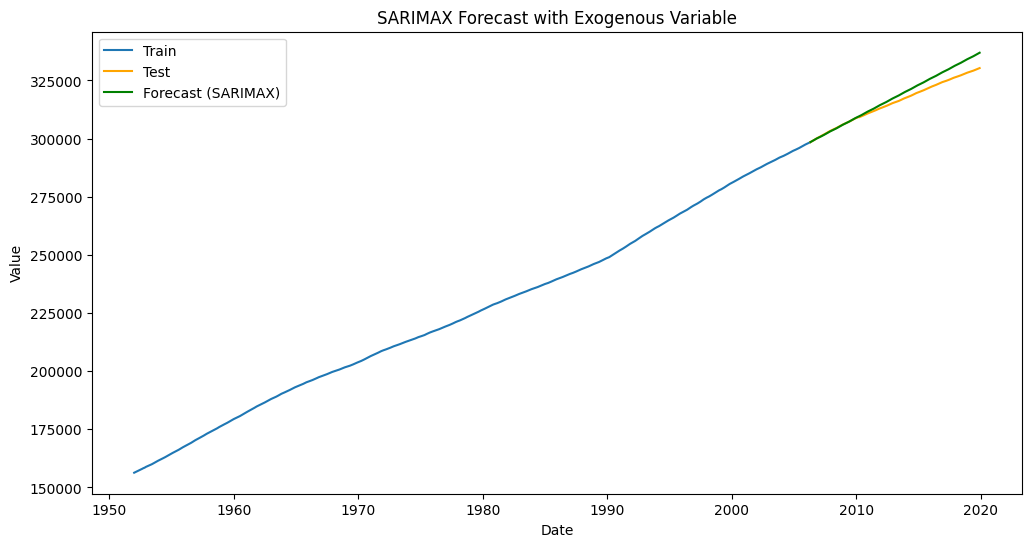

In [13]:
plt.figure(figsize=(12,6))
plt.plot(train['date'], train['value'], label='Train')
plt.plot(test['date'], test['value'], label='Test', color='orange')
plt.plot(test['date'], forecast, label='Forecast (SARIMAX)', color='green')
plt.title('SARIMAX Forecast with Exogenous Variable')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()